In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data=pd.read_csv("C:/Users/suraj/Desktop/ExcelR/Assignment 7 clustering/crime_data.csv")

In [67]:
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [68]:
data.shape

(50, 5)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [70]:
data.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [71]:
data.duplicated().sum()

0

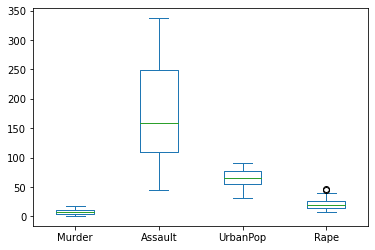

In [72]:
data.plot(kind="box")
plt.show()

In [131]:
#Hierarchical clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [132]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [133]:
data.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,3
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,3


In [134]:
from sklearn.preprocessing import MinMaxScaler
normalize = MinMaxScaler()
new_df = normalize.fit_transform(data.iloc[:,1:].to_numpy())
df_norm1 = pd.DataFrame(new_df, columns = data.columns[1:])
df_norm1

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,1.000000
1,0.554217,0.746575,0.271186,0.961240,0.000000
2,0.439759,0.852740,0.813559,0.612403,0.000000
3,0.481928,0.496575,0.305085,0.315245,0.333333
4,0.493976,0.791096,1.000000,0.860465,0.000000
5,0.427711,0.544521,0.779661,0.811370,0.000000
6,0.150602,0.222603,0.762712,0.098191,0.333333
7,0.307229,0.660959,0.677966,0.219638,0.333333
8,0.879518,0.993151,0.813559,0.635659,0.000000
9,1.000000,0.568493,0.474576,0.478036,1.000000


In [135]:
df_norm = norm_func(data.iloc[:,1:])

In [136]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,1.000000
1,0.554217,0.746575,0.271186,0.961240,0.000000
2,0.439759,0.852740,0.813559,0.612403,0.000000
3,0.481928,0.496575,0.305085,0.315245,0.333333
4,0.493976,0.791096,1.000000,0.860465,0.000000
5,0.427711,0.544521,0.779661,0.811370,0.000000
6,0.150602,0.222603,0.762712,0.098191,0.333333
7,0.307229,0.660959,0.677966,0.219638,0.333333
8,0.879518,0.993151,0.813559,0.635659,0.000000
9,1.000000,0.568493,0.474576,0.478036,1.000000


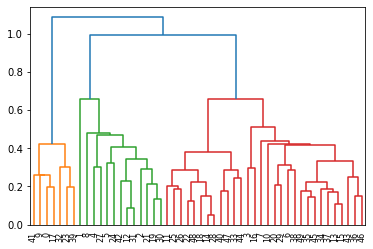

In [137]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

In [138]:
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [139]:
y_hc = hc.fit_predict(df_norm)

In [140]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [141]:
Clusters

,Clusters
0,1
1,0
2,0
3,2
4,0
5,0
6,2
7,2
8,0
9,1


In [142]:
df_norm['h_clusterid'] = Clusters

In [143]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
24,0.493976,0.455479,0.644068,0.540052,0
27,0.686747,0.708904,0.830508,1.000000,0
12,0.578313,0.698630,0.864407,0.431525,0
30,0.638554,0.821918,0.644068,0.640827,0
31,0.620482,0.715753,0.915254,0.485788,0
21,0.680723,0.719178,0.711864,0.718346,0
8,0.879518,0.993151,0.813559,0.635659,0
5,0.427711,0.544521,0.779661,0.811370,0
4,0.493976,0.791096,1.000000,0.860465,0
42,0.716867,0.534247,0.813559,0.470284,0


In [152]:
data=data['h_clusterid'] = Clusters

In [153]:
data

,Clusters,h_clusterid
0,1,1
1,0,0
2,0,0
3,2,2
4,0,0
5,0,0
6,2,2
7,2,2
8,0,0
9,1,1


In [154]:
data.sort_values("h_clusterid")

,Clusters,h_clusterid
24,0,0
27,0,0
12,0,0
30,0,0
31,0,0
21,0,0
8,0,0
5,0,0
4,0,0
42,0,0


In [155]:
data["h_clusterid"].value_counts()

2    18
0    13
3    12
1     7
Name: h_clusterid, dtype: int64